Fetching Dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [ ]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [ ]:
x,y=mnist['data'],mnist['target']

In [ ]:
x


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x.iloc[36003] if hasattr(x, 'iloc') else x[36003]
some_digit_image = some_digit.values.reshape(28, 28) if hasattr(some_digit, 'values') else some_digit.reshape(28, 28)

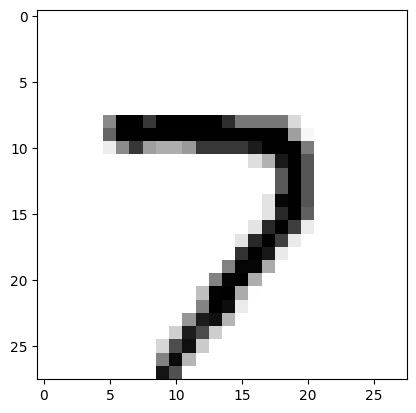

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [ ]:
y[36003]

'7'

In [ ]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]

In [ ]:
import numpy as np
shuffle_index=np.random.permutation(60000)

In [ ]:
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

Creating a 2 detector

In [ ]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)
y_train_2

,class
40633,False
37296,True
34166,False
33874,False
48414,False
...,...
57783,False
41394,False
33581,False
19281,False


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)
clf.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [ ]:
clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring='accuracy')


In [ ]:
a.mean()

np.float64(0.9788)

Creating a not 2 detector

In [ ]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_not_2=(y_train!=2)
y_test_not_2=(y_test!=2)
y_train_not_2

,class
40633,True
37296,False
34166,True
33874,True
48414,True
...,...
57783,True
41394,True
33581,True
19281,True


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1)
clf.fit(x_train,y_train_not_2)

LogisticRegression(tol=0.1)

In [ ]:
clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
b=cross_val_score(clf,x_train,y_train_not_2,cv=3,scoring='accuracy')

In [ ]:
b.mean()

np.float64(0.9788)